<a href="https://colab.research.google.com/github/prashantmalan/ALM/blob/main/ALM_balancesheet_management_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Functional Description of Investment Bank Balance Sheet Simulation</h2>

<p>This code generates a simulated balance sheet for an investment bank, categorizes assets into High-Quality Liquid Assets (HQLA) categories, and provides summary statistics. Here's a detailed explanation of the code's functionality:</p>

<h3>1. Balance Sheet Generation</h3>
<ul>
    <li><strong>generate_investment_bank_balance_sheet:</strong> This function generates a simulated balance sheet with a specified number of transactions. It creates assets and liabilities based on predefined types, maturity ranges, and interest rates. Each asset and liability type has a specified weight, which determines its proportion in the balance sheet.</li>
    <li>The function returns a DataFrame representing the balance sheet, which includes transaction details such as type, amount, maturity date, and interest rate.</li>
</ul>

<h3>2. Maturity Analysis and Summary Statistics</h3>
<ul>
    <li><strong>print_maturity_analysis:</strong> This function analyzes and prints the maturity distribution of assets or liabilities, categorizing them into predefined maturity buckets (e.g., 0-30 days, 1-2 years).</li>
    <li>The code prints a summary of the total assets and liabilities and provides a breakdown of asset and liability composition by type, showing the total amount and percentage share.</li>
</ul>

<h3>3. HQLA Categorization</h3>
<ul>
    <li><strong>assign_hqla_categories:</strong> This function assigns HQLA categories to assets based on their type. It uses a mapping of asset types to HQLA categories and assigns haircuts accordingly.</li>
    <li>Assets are categorized into 'Level 1', 'Level 2A', 'Level 2B', or 'Non-HQLA' categories, each with a specific haircut that reflects its liquidity level.</li>
</ul>

<h3>4. Data Export</h3>
<ul>
    <li>The balance sheet is exported to a CSV file named <code>investment_bank_balance_sheet.csv</code>, allowing for further analysis and record-keeping.</li>
</ul>



In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(42)
def generate_counterparty_attributes():
    """Generate realistic counterparty attributes"""

    credit_ratings = ['AAA', 'AA+', 'AA', 'AA-', 'A+', 'A', 'A-', 'BBB+', 'BBB', 'BBB-']
    industry_sectors = ['Financial Services', 'Technology', 'Healthcare', 'Manufacturing',
                       'Energy', 'Real Estate', 'Consumer Goods', 'Telecommunications']
    relationship_durations = np.random.randint(1, 20)  # Years of relationship
    past_default_rate = np.random.uniform(0, 0.05)  # Historical default rate
    financial_strength_score = np.random.uniform(0.6, 0.99)  # Composite financial strength

    return {
        'credit_rating': np.random.choice(credit_ratings),
        'industry_sector': np.random.choice(industry_sectors),
        'relationship_duration': relationship_durations,
        'past_default_rate': past_default_rate,
        'financial_strength_score': financial_strength_score
    }

def generate_investment_bank_balance_sheet(num_transactions=1000):
    current_date = datetime.now()

    # Asset Types (predominantly longer-term)
    asset_types = {
        'Corporate Loans': {
            'maturity_range': (1825, 3650),  # 5-10 years
            'rate_range': (0.045, 0.085),
            'weight': 0.40  # 25% of assets
        },
        'Investment Securities': {
            'maturity_range': (1095, 2555),  # 3-7 years
            'rate_range': (0.03, 0.06),
            'weight': 0.05  # 5% of assets
        },
        'Trading Assets': {
            'maturity_range': (1, 365),  # Up to 1 year
            'rate_range': (0.02, 0.055),
            'weight': 0.05 # 15% of assets
        },
        'Syndicated Loans': {
            'maturity_range': (2555, 4380),  # 7-12 years
            'rate_range': (0.055, 0.095),
            'weight': 0.35  # 25% of assets
        },
        'Structured Products': {
            'maturity_range': (1825, 3650),  # 5-10 years
            'rate_range': (0.04, 0.08),
            'weight': 0.15  # 15% of assets
        }
    }

    # Liability Types (predominantly shorter-term with some long-term funding)
    liability_types = {
        'Wholesale Deposits': {
            'maturity_range': (30, 90),  # 1-90 days
            'rate_range': (0.01, 0.03),
            'weight': 0.10  # 25% of liabilities
        },
        'Money Market Funding': {
            'maturity_range': (90, 180),  # 1-180 days
            'rate_range': (0.02, 0.04),
            'weight': 0.35  # 20% of liabilities
        },
        'Repo Agreements': {
            'maturity_range': (1, 5),  # 1-30 days
            'rate_range': (0.01, 0.025),
            'weight': 0.35  # 20% of liabilities
        },
        'Long-term Debt': {
            'maturity_range': (1825, 3650),  # 5-10 years
            'rate_range': (0.04, 0.07),
            'weight': 0.10  # 15% of liabilities
        },
        'Structured Notes': {
            'maturity_range': (30, 1825),  # 2-5 years
            'rate_range': (0.03, 0.06),
            'weight': 0.10  # 10% of liabilities
        },
        'Interbank Borrowing': {
            'maturity_range': (1, 90),  # 1-90 days
            'rate_range': (0.02, 0.04),
            'weight': 0.05  # 10% of liabilities
        }
    }

    assets = []
    liabilities = []

    # Generate Assets
    for asset_type, characteristics in asset_types.items():
        n_transactions = int(num_transactions/2 * characteristics['weight'])
        for i in range(n_transactions):
            maturity_days = np.random.randint(*characteristics['maturity_range'])
            rate = np.random.uniform(*characteristics['rate_range'])
            amount = np.random.uniform(5000000, 20000000)  # 5M to 20M per transaction
            counterparty_attrs = generate_counterparty_attributes()
            assets.append({
                'transaction_id': f'A{len(assets)+1:05d}',
                'type': asset_type,
                'amount': amount,
                'start_date': current_date,
                'maturity_date': current_date + timedelta(days=maturity_days),
                'interest_rate': rate,
                'remaining_maturity_days': maturity_days,
                'counterparty_credit_rating': counterparty_attrs['credit_rating'],
                'counterparty_industry': counterparty_attrs['industry_sector'],
                'counterparty_relationship_years': counterparty_attrs['relationship_duration'],
                'counterparty_default_history': counterparty_attrs['past_default_rate'],
                'counterparty_financial_strength': counterparty_attrs['financial_strength_score']
            })

    # Generate Liabilities
    for liability_type, characteristics in liability_types.items():
        n_transactions = int(num_transactions/2 * characteristics['weight'])
        for i in range(n_transactions):
            maturity_days = np.random.randint(*characteristics['maturity_range'])
            rate = np.random.uniform(*characteristics['rate_range'])
            amount = np.random.uniform(5000000, 20000000)  # 5M to 20M per transaction
            counterparty_attrs = generate_counterparty_attributes()
            liabilities.append({
              'transaction_id': f'L{len(liabilities)+1:05d}',
              'type': liability_type,
              'amount': amount,
              'start_date': current_date,
              'maturity_date': current_date + timedelta(days=maturity_days),
              'interest_rate': rate,
              'remaining_maturity_days': maturity_days,
              'counterparty_credit_rating': counterparty_attrs['credit_rating'],
              'counterparty_industry': counterparty_attrs['industry_sector'],
              'counterparty_relationship_years': counterparty_attrs['relationship_duration'],
              'counterparty_default_history': counterparty_attrs['past_default_rate'],
              'counterparty_financial_strength': counterparty_attrs['financial_strength_score']
})
    # Create DataFrames
    assets_df = pd.DataFrame(assets)
    liabilities_df = pd.DataFrame(liabilities)

    # Add side identifier
    assets_df['side'] = 'Asset'
    liabilities_df['side'] = 'Liability'

    # Combine into one balance sheet
    balance_sheet = pd.concat([assets_df, liabilities_df], axis=0)

    return balance_sheet

# Generate the balance sheet
balance_sheet = generate_investment_bank_balance_sheet()

# Analysis and Summary Statistics
def print_maturity_analysis(df, side):
    maturity_buckets = [
        (0, 30, '0-30 days'),
        (31, 90, '31-90 days'),
        (91, 180, '91-180 days'),
        (181, 365, '181-365 days'),
        (366, 730, '1-2 years'),
        (731, 1825, '2-5 years'),
        (1826, 3650, '5-10 years'),
        (3651, float('inf'), '>10 years')
    ]

    print(f"\n{side} Maturity Analysis:")
    print("-" * 50)

    for start, end, label in maturity_buckets:
        mask = (df['remaining_maturity_days'] > start) & (df['remaining_maturity_days'] <= end)
        bucket_sum = df[mask]['amount'].sum()
        bucket_pct = (bucket_sum / df['amount'].sum()) * 100
        print(f"{label}: ${bucket_sum/1e6:.2f}M ({bucket_pct:.1f}%)")

print("\nBalance Sheet Summary:")
print("----------------------")
print(f"Total Assets: ${balance_sheet[balance_sheet['side']=='Asset']['amount'].sum()/1e6:.2f}M")
print(f"Total Liabilities: ${balance_sheet[balance_sheet['side']=='Liability']['amount'].sum()/1e6:.2f}M")

print("\nAsset Composition:")
asset_summary = balance_sheet[balance_sheet['side']=='Asset'].groupby('type')['amount'].agg(['sum', 'count'])
asset_summary['percentage'] = (asset_summary['sum'] / asset_summary['sum'].sum()) * 100
print(asset_summary)

print("\nLiability Composition:")
liability_summary = balance_sheet[balance_sheet['side']=='Liability'].groupby('type')['amount'].agg(['sum', 'count'])
liability_summary['percentage'] = (liability_summary['sum'] / liability_summary['sum'].sum()) * 100
print(liability_summary)

# Print maturity analysis
print_maturity_analysis(balance_sheet[balance_sheet['side']=='Asset'], 'Assets')
print_maturity_analysis(balance_sheet[balance_sheet['side']=='Liability'], 'Liabilities')

# Save to CSV
balance_sheet.to_csv('investment_bank_balance_sheet.csv', index=False)


def assign_hqla_categories(balance_sheet_df):
    """Assign HQLA categories to assets based on type"""

    # Define the mapping of asset types to HQLA categories
    hqla_mapping = {
        'Corporate Loans': 'Non-HQLA',
        'Investment Securities': 'Level 2A',
        'Trading Assets': 'Level 1',
        'Syndicated Loans': 'Non-HQLA',
        'Structured Products': 'Level 2B'
    }

    # Define haircuts for each HQLA category
    hqla_haircuts = {
        'Level 1': 0.00,
        'Level 2A': 0.15,
        'Level 2B': 0.50,
        'Non-HQLA': 1.00
    }

    # Ensure balance_sheet_df is a DataFrame
    balance_sheet_df = pd.DataFrame(balance_sheet_df)

    # Add HQLA category and haircut to each asset
    balance_sheet_df['hqla_category'] = balance_sheet_df.apply(
        lambda row: hqla_mapping.get(row['type'], 'Non-HQLA') if row['side'] == 'Asset' else None, axis=1
    )
    balance_sheet_df['haircut'] = balance_sheet_df.apply(
        lambda row: hqla_haircuts.get(row['hqla_category'], 1.00) if row['side'] == 'Asset' else None, axis=1
    )

    return balance_sheet_df

balance_sheet= assign_hqla_categories(balance_sheet)


Balance Sheet Summary:
----------------------
Total Assets: $6309.14M
Total Liabilities: $6479.25M

Asset Composition:
                                sum  count  percentage
type                                                  
Corporate Loans        2.584291e+09    200   40.961048
Investment Securities  2.999180e+08     25    4.753705
Structured Products    9.447427e+08     75   14.974183
Syndicated Loans       2.212597e+09    175   35.069694
Trading Assets         2.675941e+08     25    4.241370

Liability Composition:
                               sum  count  percentage
type                                                 
Interbank Borrowing   3.104459e+08     25    4.791388
Long-term Debt        6.464087e+08     50    9.976602
Money Market Funding  2.131552e+09    175   32.898137
Repo Agreements       2.090723e+09    175   32.267986
Structured Notes      6.451712e+08     50    9.957502
Wholesale Deposits    6.549473e+08     50   10.108385

Assets Maturity Analysis:
------------

In [2]:
def analyze_counterparty_metrics(balance_sheet):
    print("\nCounterparty Analysis:")
    print("-" * 50)

    # Credit Rating Distribution
    print("\nCredit Rating Distribution:")
    print(balance_sheet['counterparty_credit_rating'].value_counts(normalize=True))

    # Industry Distribution
    print("\nIndustry Distribution:")
    print(balance_sheet['counterparty_industry'].value_counts(normalize=True))

    # Relationship Duration Statistics
    print("\nRelationship Duration Statistics:")
    print(balance_sheet['counterparty_relationship_years'].describe())

    # Default History Statistics
    print("\nDefault History Statistics:")
    print(balance_sheet['counterparty_default_history'].describe())

    # Financial Strength Score Statistics
    print("\nFinancial Strength Score Statistics:")
    print(balance_sheet['counterparty_financial_strength'].describe())

# Call the analysis function after generating the balance sheet
analyze_counterparty_metrics(balance_sheet)


Counterparty Analysis:
--------------------------------------------------

Credit Rating Distribution:
counterparty_credit_rating
BBB     0.111220
A-      0.110244
AA+     0.104390
AAA     0.100488
A       0.099512
AA-     0.098537
AA      0.097561
BBB+    0.094634
BBB-    0.094634
A+      0.088780
Name: proportion, dtype: float64

Industry Distribution:
counterparty_industry
Energy                0.142439
Telecommunications    0.134634
Manufacturing         0.125854
Healthcare            0.124878
Consumer Goods        0.122927
Technology            0.118049
Financial Services    0.117073
Real Estate           0.114146
Name: proportion, dtype: float64

Relationship Duration Statistics:
count    1025.000000
mean       10.118049
std         5.431095
min         1.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        19.000000
Name: counterparty_relationship_years, dtype: float64

Default History Statistics:
count    1025.000000
mean        0.024858
std        

<h3>5. HQLA Composition Analysis</h3>
<ul>
    <li><strong>HQLA Composition Calculation:</strong> This section of the code calculates the composition of High-Quality Liquid Assets (HQLA) as a percentage of total assets. It provides insights into how much of the bank's assets are classified as HQLA, which is critical for assessing liquidity.</li>
    <li><strong>Grouping and Summation:</strong> The code groups assets by their HQLA category and calculates the total amount for each category using the <code>groupby</code> and <code>sum</code> methods.</li>
    <li><strong>Percentage Calculation:</strong> It calculates the percentage of each HQLA category relative to the total assets by dividing the HQLA composition by the total asset amount and multiplying by 100.</li>
    <li><strong>Output:</strong> The results are printed as "HQLA Composition (% of Total Assets)", providing a clear overview of the liquidity profile of the asset portfolio.</li>
</ul>

In [3]:


hqla_composition = balance_sheet[balance_sheet['side'] == 'Asset'].groupby('hqla_category')['amount'].sum()
total_assets = balance_sheet[balance_sheet['side'] == 'Asset']['amount'].sum()
hqla_composition_percentage = (hqla_composition / total_assets) * 100
print("\nHQLA Composition (% of Total Assets):")
hqla_composition_percentage



HQLA Composition (% of Total Assets):


,amount
hqla_category,
Level 1,4.241370
Level 2A,4.753705
Level 2B,14.974183
Non-HQLA,76.030742


<h3>6. Asset and Liability Maturity Profile Visualization</h3>
<ul>
    <li><strong>Purpose:</strong> This code segment visualizes the maturity profile of assets and liabilities by year, providing insights into how the bank's financial obligations and holdings are distributed over time.</li>
    <li><strong>Maturity Year Extraction:</strong> The code first extracts the year from the maturity date of each transaction and adds it as a new column, <code>maturity_year</code>, to the balance sheet DataFrame.</li>
    <li><strong>Grouping and Summation:</strong> It groups the assets and liabilities by their maturity year and calculates the total amount maturing in each year using the <code>groupby</code> and <code>sum</code> methods.</li>
    <li><strong>Bar Chart Visualization:</strong> A bar chart is created using Matplotlib to compare the maturity amounts of assets and liabilities for each year. The assets are represented in blue bars, while liabilities are shown in red bars, with a slight offset for clarity.</li>
    <li><strong>Chart Customization:</strong> The chart includes labeled axes, a title ("Asset and Liability Maturity Profile"), and a legend to distinguish between assets and liabilities.</li>
    <li><strong>Presentation:</strong> The x-ticks are rotated for better readability, and <code>plt.tight_layout()</code> is used to ensure that the layout is not overlapping.</li>
</ul>

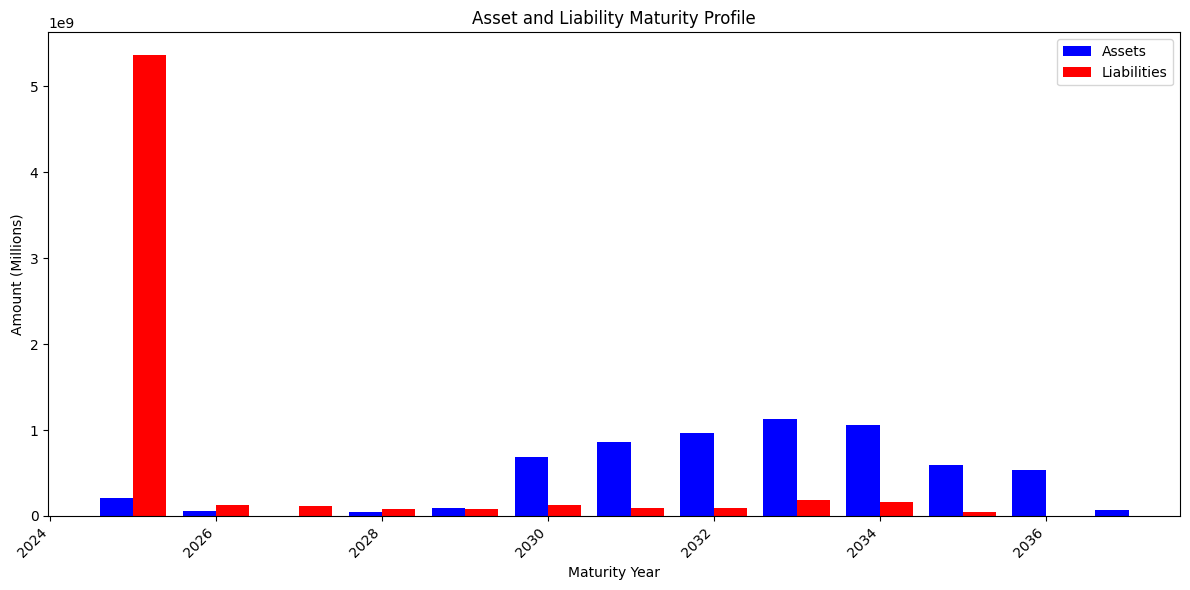

,transaction_id,type,amount,start_date,maturity_date,interest_rate,remaining_maturity_days,counterparty_credit_rating,counterparty_industry,counterparty_relationship_years,counterparty_default_history,counterparty_financial_strength,side,hqla_category,haircut,maturity_year
0,A00001,Corporate Loans,7.751522e+06,2025-03-26 18:06:13.016419,2033-04-24 18:06:13.016419,0.076862,2951,AA,Consumer Goods,8,0.029933,0.660847,Asset,Non-HQLA,1.0,2033
1,A00002,Corporate Loans,1.000563e+07,2025-03-26 18:06:13.016419,2031-02-18 18:06:13.016419,0.063370,2155,AA+,Telecommunications,8,0.035404,0.608028,Asset,Non-HQLA,1.0,2031
2,A00003,Corporate Loans,5.011681e+06,2025-03-26 18:06:13.016419,2034-05-18 18:06:13.016419,0.082542,3340,BBB,Financial Services,1,0.015212,0.804655,Asset,Non-HQLA,1.0,2034
3,A00004,Corporate Loans,7.092408e+06,2025-03-26 18:06:13.016419,2031-07-12 18:06:13.016419,0.069474,2299,AA,Manufacturing,16,0.011639,0.635337,Asset,Non-HQLA,1.0,2031
4,A00005,Corporate Loans,1.200144e+07,2025-03-26 18:06:13.016419,2034-08-01 18:06:13.016419,0.084329,3415,A-,Technology,5,0.030377,0.666504,Asset,Non-HQLA,1.0,2034


In [4]:


import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt


balance_sheet['maturity_year'] = balance_sheet['maturity_date'].dt.year

asset_maturity = balance_sheet[balance_sheet['side'] == 'Asset'].groupby('maturity_year')['amount'].sum()
liability_maturity = balance_sheet[balance_sheet['side'] == 'Liability'].groupby('maturity_year')['amount'].sum()

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(asset_maturity.index - 0.2, asset_maturity.values, width=0.4, label='Assets', color='blue')
ax.bar(liability_maturity.index + 0.2, liability_maturity.values, width=0.4, label='Liabilities', color='red')

ax.set_xlabel('Maturity Year')
ax.set_ylabel('Amount (Millions)')
ax.set_title('Asset and Liability Maturity Profile')
ax.legend()

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
balance_sheet.head()

<h3>7. Daily Net Cash Outflow and HQLA Calculation</h3>
<ul>
    <li><strong>Purpose:</strong> This code segment calculates and displays the daily net cash outflows and High-Quality Liquid Assets (HQLA) over a 7-day period, providing insights into short-term liquidity management.</li>
    <li><strong>DataFrame Initialization:</strong> A DataFrame named <code>daily_data</code> is initialized with columns for the date, net cash outflow, total HQLA, and cumulative HQLA.</li>
    <li><strong>Date Range:</strong> The calculation period is set to 7 days, starting from the earliest transaction date in the balance sheet.</li>
    <li><strong>Net Cash Outflow Calculation:</strong> For each day, the code calculates the net cash outflow by subtracting the total cash inflows (from maturing assets) from the total cash outflows (from maturing liabilities).</li>
    <li><strong>HQLA Calculation:</strong> The total amount of HQLA is calculated for each day by summing the amounts of assets categorized as HQLA.</li>
    <li><strong>Cumulative HQLA Calculation:</strong> The cumulative HQLA is updated daily, adding the current day's HQLA to the cumulative total from the previous day.</li>
    <li><strong>Data Collection:</strong> Daily calculations are appended to the <code>daily_data</code> DataFrame.</li>
    <li><strong>Total Net Cash Outflow:</strong> After the loop, the total net cash outflow over the 7-day period is calculated and displayed.</li>
    <li><strong>Output:</strong> The code prints a table of daily net cash outflows and HQLA, along with the total net cash outflow for the 7-day period.</li>
</ul>

In [5]:

import pandas as pd
from datetime import datetime, timedelta


daily_data = pd.DataFrame(columns=['Date', 'Net_Cash_Outflow', 'Total_HQLA', 'Cumulative_HQLA'])

start_date = balance_sheet['start_date'].min()
end_date = start_date + timedelta(days=6)  # 7 days from start_date

current_date = start_date
while current_date <= end_date:
    # Net Cash Outflow
    cash_outflows = balance_sheet[
        (balance_sheet['side'] == 'Liability') &
        (balance_sheet['maturity_date'] == current_date)
    ]['amount'].sum()

    cash_inflows = balance_sheet[
        (balance_sheet['side'] == 'Asset') &
        (balance_sheet['maturity_date'] == current_date)
    ]['amount'].sum()

    net_cash_outflow = cash_outflows - cash_inflows

    # HQLA
    hqla_assets = balance_sheet[
        (balance_sheet['side'] == 'Asset') &
        (balance_sheet['hqla_category'] != 'Non-HQLA')
    ]['amount'].sum()

    # Cumulative HQLA
    if len(daily_data) == 0:
        cumulative_hqla = hqla_assets
    else:
        cumulative_hqla = daily_data['Cumulative_HQLA'].iloc[-1] + hqla_assets


    daily_data = pd.concat([daily_data, pd.DataFrame({
        'Date': [current_date],
        'Net_Cash_Outflow': [net_cash_outflow],
        'Total_HQLA': [hqla_assets],
        'Cumulative_HQLA': [cumulative_hqla]
    })], ignore_index=True)

    current_date += timedelta(days=1)

# Calculate sum of Net Cash Outflow for 7 days
total_net_cash_outflow = daily_data['Net_Cash_Outflow'].sum()

# Display the table
print("Daily Net Cash Outflow and HQLA")
print("------------------------------")
print(daily_data)
print("\nTotal Net Cash Outflow for 7 days:", total_net_cash_outflow)


Daily Net Cash Outflow and HQLA
------------------------------
                        Date  Net_Cash_Outflow    Total_HQLA  Cumulative_HQLA
0 2025-03-26 18:06:13.016419      0.000000e+00  1.512255e+09     1.512255e+09
1 2025-03-27 18:06:13.016419      5.123158e+08  1.512255e+09     3.024510e+09
2 2025-03-28 18:06:13.016419      6.445325e+08  1.512255e+09     4.536764e+09
3 2025-03-29 18:06:13.016419      4.597963e+08  1.512255e+09     6.049019e+09
4 2025-03-30 18:06:13.016419      4.978424e+08  1.512255e+09     7.561274e+09
5 2025-03-31 18:06:13.016419      0.000000e+00  1.512255e+09     9.073529e+09
6 2025-04-01 18:06:13.016419      0.000000e+00  1.512255e+09     1.058578e+10

Total Net Cash Outflow for 7 days: 2114487055.4997118


<ipython-input-5-3aa50832d1a2>:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  daily_data = pd.concat([daily_data, pd.DataFrame({


<h3>8. Simulation of Liability Maturation and Balance Sheet Impact</h3>
<ul>
    <li><strong>Purpose:</strong> This code simulates the maturation of liabilities and its impact on the balance sheet over a specified period, illustrating how liabilities affect total assets and liabilities.</li>
    <li><strong>Simulation Function:</strong> The <code>simulate_liability_maturing</code> function simulates the daily maturation of liabilities. It reduces assets to cover maturing liabilities and updates the balance sheet accordingly.</li>
    <li><strong>Simulation Process:</strong>
        <ul>
            <li>The function iterates over each day in the simulation period, identifying liabilities maturing on or before the current date.</li>
            <li>If maturing liabilities exist, it reduces assets in the order of their maturity to cover the liability amounts, removing or adjusting asset entries as needed.</li>
            <li>Maturing liabilities are removed from the balance sheet.</li>
            <li>The balance sheet state is recorded for each day of the simulation.</li>
        </ul>
    </li>
    <li><strong>Visualization:</strong> After the simulation, a line plot is generated using Matplotlib to visualize the change in total assets and liabilities over time.
        <ul>
            <li><code>Total Assets</code> and <code>Total Liabilities</code> are plotted against the number of simulation days, providing a visual representation of the balance sheet dynamics.</li>
            <li>The plot includes labeled axes, a title ("Impact of Liability Maturation on Balance Sheet"), and a legend to distinguish between assets and liabilities.</li>
        </ul>
    </li>
    <li><strong>Output:</strong> The plot offers insights into how liability maturation impacts the balance sheet, highlighting potential liquidity pressures and changes in financial stability.</li>
</ul>

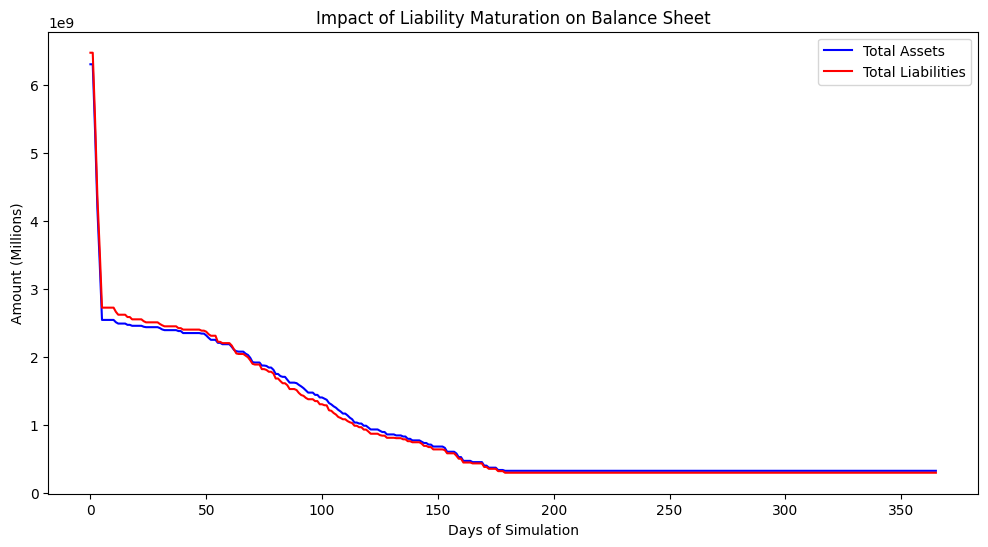

In [6]:

import matplotlib.pyplot as plt

def simulate_liability_maturing(balance_sheet, days_to_simulate=365):
  """Simulates liability maturing and its impact on the balance sheet.

  Args:
    balance_sheet: The pandas DataFrame representing the balance sheet.
    days_to_simulate: The number of days to simulate.

  Returns:
    A list of balance sheets at each step of the simulation.
  """
  balance_sheet_history = [balance_sheet.copy()]
  for day in range(days_to_simulate):
    current_date = datetime.now() + timedelta(days=day)
    maturing_liabilities = balance_sheet[
        (balance_sheet['side'] == 'Liability') &
        (balance_sheet['maturity_date'] <= current_date)
    ].copy()

    if not maturing_liabilities.empty:
      # Reduce assets to cover maturing liabilities
      total_maturing_liabilities = maturing_liabilities['amount'].sum()

      # Select assets for repayment in order of their maturity
      sorted_assets = balance_sheet[balance_sheet['side'] == 'Asset'].sort_values(by=['maturity_date'])

      for _, asset in sorted_assets.iterrows():
        if total_maturing_liabilities <= 0:
          break
        if asset['amount'] <= total_maturing_liabilities:
          total_maturing_liabilities -= asset['amount']
          balance_sheet = balance_sheet.drop(asset.name)
        else:
          balance_sheet.loc[asset.name, 'amount'] -= total_maturing_liabilities
          total_maturing_liabilities = 0


      # Remove maturing liabilities from the balance sheet
      balance_sheet = balance_sheet[~balance_sheet.index.isin(maturing_liabilities.index)]

    balance_sheet_history.append(balance_sheet.copy())
  return balance_sheet_history


# Simulate liability maturation
balance_sheet_history = simulate_liability_maturing(balance_sheet)

# Plot the change in total assets and liabilities over time
total_assets = [df[df['side'] == 'Asset']['amount'].sum() for df in balance_sheet_history]
total_liabilities = [df[df['side'] == 'Liability']['amount'].sum() for df in balance_sheet_history]

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(total_assets, label='Total Assets', color='blue')
ax.plot(total_liabilities, label='Total Liabilities', color='red')

ax.set_xlabel('Days of Simulation')
ax.set_ylabel('Amount (Millions)')
ax.set_title('Impact of Liability Maturation on Balance Sheet')
ax.legend()
plt.show()



### Simulation of Balance Sheet Valuation Under Various Scenarios


**Purpose:**  
This code simulates the valuation of a balance sheet over a 30-day period under different rollover scenarios. It assesses the impact of liability maturities and funding challenges on the balance sheet size.


**Simulation Function:**  
- The `simulate_balance_sheet_valuation` function runs the simulation for four scenarios: High Rollover, Medium Rollover, Low Rollover, and Stress Scenario.

- Each scenario has specific probabilities for rollover success and parameters affecting asset reduction and new funding ratios.
- For each day, the function calculates the total maturing liabilities and applies a reduction to current assets based on scenario-specific parameters, recording the results daily.


**Data Visualization:**  
- **Balance Sheet Size Evolution Plot:** A line plot shows the percentage of the initial balance sheet size over 30 days for each scenario, providing insights into how the balance sheet evolves under different conditions.

- **Absolute Balance Sheet Size Plot:** Another plot displays the absolute balance sheet size in billions, offering a clear view of the total assets over time.
- **Heatmap:** A heatmap visualizes the balance sheet size ratio by day and scenario, highlighting periods of significant change and the relative stability of different scenarios.


**Summary Statistics:**  
- The code prints detailed statistics for each scenario, including initial and final balance sheet sizes, total reduction percentages, and minimum size ratios.

- Daily changes in total assets, maturing amounts, and reductions are also displayed in a pivot table format.


**Data Export:**  
The simulation results are saved to CSV files for further analysis, maintaining a record of both detailed results and scenario summaries.


Balance Sheet Size Ratio by Day and Scenario:
--------------------------------------------------------------------------------


Scenario,High_Rollover,Low_Rollover,Medium_Rollover,Stress_Scenario
Day,,,,
0,1.000000,1.000000,1.000000,1.000000
1,0.995940,0.975639,0.987820,0.959399
2,0.990832,0.944992,0.972496,0.908320
3,0.987188,0.923128,0.961564,0.871881
4,0.983243,0.899456,0.949728,0.832427
5,0.983243,0.899456,0.949728,0.832427
6,0.983243,0.899456,0.949728,0.832427
7,0.983243,0.899456,0.949728,0.832427
8,0.983243,0.899456,0.949728,0.832427


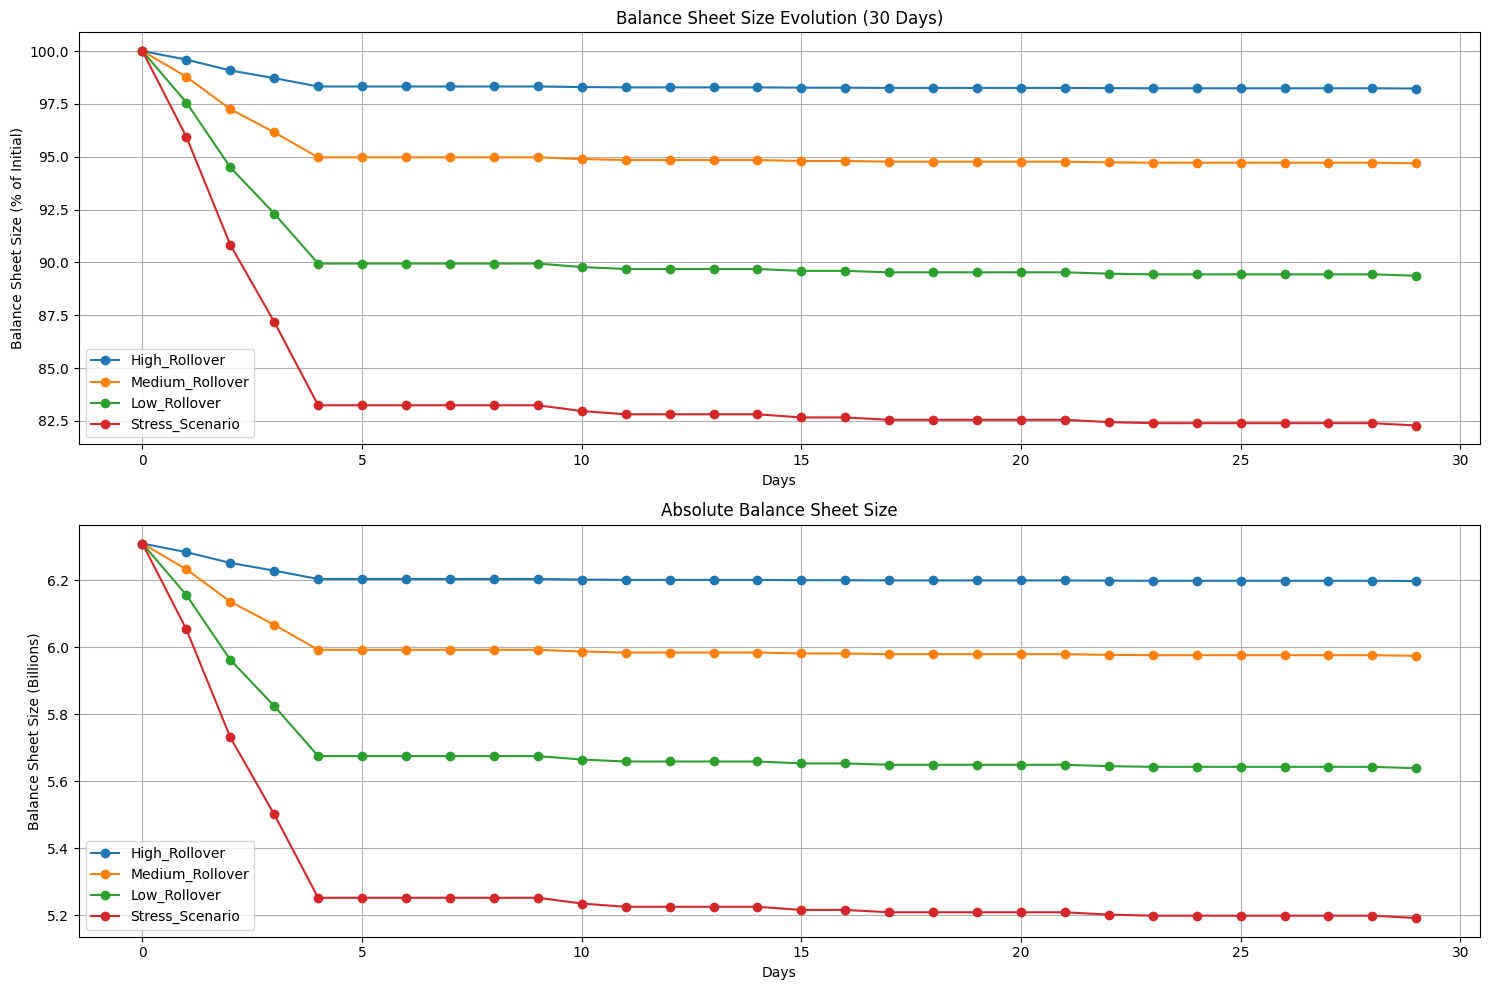

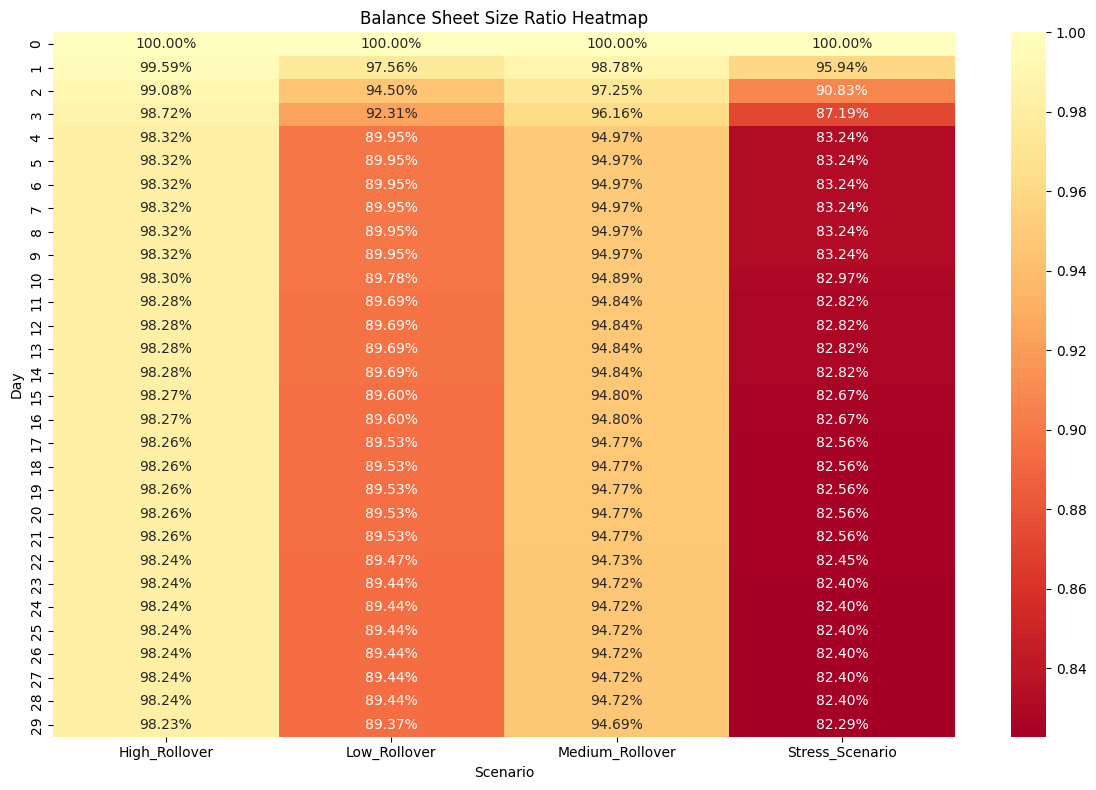


Detailed Statistics by Scenario:
--------------------------------------------------------------------------------

Scenario: High_Rollover
Initial Balance Sheet Size: $6.31B
Final Balance Sheet Size: $6.20B
Total Reduction: 1.77%
Minimum Size Ratio: 98.23%

Scenario: Medium_Rollover
Initial Balance Sheet Size: $6.31B
Final Balance Sheet Size: $5.97B
Total Reduction: 5.31%
Minimum Size Ratio: 94.69%

Scenario: Low_Rollover
Initial Balance Sheet Size: $6.31B
Final Balance Sheet Size: $5.64B
Total Reduction: 10.63%
Minimum Size Ratio: 89.37%

Scenario: Stress_Scenario
Initial Balance Sheet Size: $6.31B
Final Balance Sheet Size: $5.19B
Total Reduction: 17.71%
Minimum Size Ratio: 82.29%

Daily Balance Sheet Changes:
--------------------------------------------------------------------------------


Maturing_Amount                                                \
Scenario     High_Rollover  Low_Rollover Medium_Rollover Stress_Scenario   
Date                                                                       
2025-03-26    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-03-27    5.123158e+08  5.123158e+08    5.123158e+08    5.123158e+08   
2025-03-28    6.445325e+08  6.445325e+08    6.445325e+08    6.445325e+08   
2025-03-29    4.597963e+08  4.597963e+08    4.597963e+08    4.597963e+08   
2025-03-30    4.978424e+08  4.978424e+08    4.978424e+08    4.978424e+08   
2025-03-31    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-01    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-02    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-03    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-04    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-05    3.423750e+07  3.423750e+07    3.423750e+07    3.423750e+07   
2025-04-06    1.952033e+07  1.952033e+07    1.952033e+07    1.952033e+07   
2025-04-07    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-08    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-09    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-10    1.877782e+07  1.877782e+07    1.877782e+07    1.877782e+07   
2025-04-11    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-12    1.403662e+07  1.403662e+07    1.403662e+07    1.403662e+07   
2025-04-13    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-14    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-15    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-16    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-17    1.381022e+07  1.381022e+07    1.381022e+07    1.381022e+07   
2025-04-18    6.470668e+06  6.470668e+06    6.470668e+06    6.470668e+06   
2025-04-19    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-20    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-21    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-22    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-23    0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-24    1.382216e+07  1.382216e+07    1.382216e+07    1.382216e+07   

               Reduction                                                \
Scenario   High_Rollover  Low_Rollover Medium_Rollover Stress_Scenario   
Date                                                                     
2025-03-26  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-03-27  2.561579e+07  1.536947e+08    7.684737e+07    2.561579e+08   
2025-03-28  3.222663e+07  1.933598e+08    9.667988e+07    3.222663e+08   
2025-03-29  2.298982e+07  1.379389e+08    6.896945e+07    2.298982e+08   
2025-03-30  2.489212e+07  1.493527e+08    7.467636e+07    2.489212e+08   
2025-03-31  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-01  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-02  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-03  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-04  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-05  1.711875e+06  1.027125e+07    5.135624e+06    1.711875e+07   
2025-04-06  9.760166e+05  5.856100e+06    2.928050e+06    9.760166e+06   
2025-04-07  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-08  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-09  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-10  9.388911e+05  5.633347e+06    2.816673e+06    9.388911e+06   
2025-04-11  0.000000e+00  0.000000e+00    0.000000e+00    0.000000e+00   
2025-04-12  7.018308e+

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from IPython.display import display

def simulate_balance_sheet_valuation(balance_sheet_df, simulation_days=30):
    scenarios = {
        'High_Rollover': {
            'short_term_prob': 0.95,
            'medium_term_prob': 0.90,
            'long_term_prob': 0.98,
            'new_funding_ratio': 1.0,
            'asset_reduction_factor': 0.05
        },
        'Medium_Rollover': {
            'short_term_prob': 0.80,
            'medium_term_prob': 0.75,
            'long_term_prob': 0.85,
            'new_funding_ratio': 0.8,
            'asset_reduction_factor': 0.15
        },
        'Low_Rollover': {
            'short_term_prob': 0.60,
            'medium_term_prob': 0.55,
            'long_term_prob': 0.65,
            'new_funding_ratio': 0.5,
            'asset_reduction_factor': 0.30
        },
        'Stress_Scenario': {
            'short_term_prob': 0.30,
            'medium_term_prob': 0.25,
            'long_term_prob': 0.35,
            'new_funding_ratio': 0.2,
            'asset_reduction_factor': 0.50
        }
    }

    all_results = []
    initial_bs_size = balance_sheet_df[balance_sheet_df['side'] == 'Asset']['amount'].sum()

    for scenario_name, params in scenarios.items():
        current_bs = balance_sheet_df.copy()
        current_date = datetime.now()

        # Initialize current_assets at the start
        current_assets = initial_bs_size

        for day in range(simulation_days):
            simulation_date = current_date + timedelta(days=day)

            # Identify maturing liabilities
            maturing_mask = (current_bs['side'] == 'Liability') & \
                          (current_bs['maturity_date'].dt.date == simulation_date.date())
            maturing_liabilities = current_bs[maturing_mask]

            # Calculate reductions
            total_maturing = maturing_liabilities['amount'].sum()
            if total_maturing > 0:
                # Calculate reduction based on scenario parameters
                reduction = total_maturing * params['asset_reduction_factor']
                # Apply reduction to current assets
                current_assets = max(current_assets - reduction, current_assets * 0.5)

            # Store daily results
            all_results.append({
                'Date': simulation_date.strftime('%Y-%m-%d'),
                'Scenario': scenario_name,
                'Total_Assets': current_assets,
                'BS_Size_Ratio': current_assets / initial_bs_size,
                'Day': day,
                'Maturing_Amount': total_maturing,
                'Reduction': reduction if total_maturing > 0 else 0
            })

    return pd.DataFrame(all_results)

# Run simulation
simulation_results = simulate_balance_sheet_valuation(balance_sheet)

# Create summary table
summary_pivot = simulation_results.pivot_table(
    index='Day',
    columns='Scenario',
    values='BS_Size_Ratio',
    aggfunc='first'
)

print("\nBalance Sheet Size Ratio by Day and Scenario:")
print("-" * 80)
display(summary_pivot)

# Plotting
plt.figure(figsize=(15, 10))

# Plot 1: Balance Sheet Size Evolution
plt.subplot(2, 1, 1)
for scenario in simulation_results['Scenario'].unique():
    scenario_data = simulation_results[simulation_results['Scenario'] == scenario]
    plt.plot(scenario_data['Day'],
            scenario_data['BS_Size_Ratio'] * 100,
            label=scenario,
            marker='o')

plt.title('Balance Sheet Size Evolution (30 Days)')
plt.xlabel('Days')
plt.ylabel('Balance Sheet Size (% of Initial)')
plt.legend()
plt.grid(True)

# Plot 2: Absolute Balance Sheet Size
plt.subplot(2, 1, 2)
for scenario in simulation_results['Scenario'].unique():
    scenario_data = simulation_results[simulation_results['Scenario'] == scenario]
    plt.plot(scenario_data['Day'],
            scenario_data['Total_Assets'] / 1e9,
            label=scenario,
            marker='o')

plt.title('Absolute Balance Sheet Size')
plt.xlabel('Days')
plt.ylabel('Balance Sheet Size (Billions)')
plt.legend()
plt.grid(True)

plt.tight_layout()
display(plt.gcf())
plt.close()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(summary_pivot,
            annot=True,
            fmt='.2%',
            cmap='RdYlGn',
            center=1.0)
plt.title('Balance Sheet Size Ratio Heatmap')
plt.tight_layout()
display(plt.gcf())
plt.close()

# Print detailed statistics
print("\nDetailed Statistics by Scenario:")
print("-" * 80)
for scenario in simulation_results['Scenario'].unique():
    scenario_data = simulation_results[simulation_results['Scenario'] == scenario]
    print(f"\nScenario: {scenario}")
    print(f"Initial Balance Sheet Size: ${scenario_data.iloc[0]['Total_Assets']/1e9:.2f}B")
    print(f"Final Balance Sheet Size: ${scenario_data.iloc[-1]['Total_Assets']/1e9:.2f}B")
    print(f"Total Reduction: {(1 - scenario_data.iloc[-1]['BS_Size_Ratio'])*100:.2f}%")
    print(f"Minimum Size Ratio: {scenario_data['BS_Size_Ratio'].min()*100:.2f}%")

# Additional analysis: Daily changes
print("\nDaily Balance Sheet Changes:")
print("-" * 80)
daily_changes = simulation_results.pivot_table(
    index='Date',
    columns='Scenario',
    values=['Total_Assets', 'Maturing_Amount', 'Reduction'],
    aggfunc='first'
)
display(daily_changes)

# Save results
simulation_results.to_csv('detailed_simulation_results.csv', index=False)
summary_pivot.to_csv('summary_by_scenario.csv')

In [8]:
balance_sheet.columns

Index(['transaction_id', 'type', 'amount', 'start_date', 'maturity_date',
       'interest_rate', 'remaining_maturity_days',
       'counterparty_credit_rating', 'counterparty_industry',
       'counterparty_relationship_years', 'counterparty_default_history',
       'counterparty_financial_strength', 'side', 'hqla_category', 'haircut',
       'maturity_year'],
      dtype='object')

### Simulation of Balance Sheet with LCR Calculation


**Purpose:**  
This code simulates a balance sheet over a 10-day period, calculating the Liquidity Coverage Ratio (LCR) under different rollover scenarios. It evaluates how liability maturities and asset availability impact the bank's liquidity position.


**Key Functions and Logic:**


- **`calculate_lcr_metrics`:**  
  This function calculates the High-Quality Liquid Assets (HQLA) value and the LCR based on maturing liabilities and assets. It considers the haircut applied to different HQLA categories and calculates net cash outflows.


- **`simulate_balance_sheet_with_lcr`:**  
  This function runs the simulation for four scenarios: High Rollover, Medium Rollover, Low Rollover, and Stress Scenario. Each scenario has specific probabilities for the success of short-term, medium-term, and long-term rollovers.


- **Daily Operations:**
  - For each day, the function identifies maturing liabilities and assets.
  - It calculates LCR metrics using `calculate_lcr_metrics` and prints relevant metrics such as HQLA and LCR.
  - If the LCR is below 1.0, it suggests the amount of additional HQLA needed. If it's above 1.5, it suggests the amount of excess HQLA that can be released.
  - The function simulates asset sales to cover liabilities when rollover probabilities are not met.


**Outputs:**


- The simulation results are stored in a DataFrame and printed as a grid showing the Date, Scenario, HQLA, LCR, and Recommendations for each day.


**Usage:**

To run this simulation, ensure you have a `balance_sheet` DataFrame with assigned HQLA categories. Execute the `simulate_balance_sheet_with_lcr` function to obtain the simulation results.


In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

def calculate_lcr_metrics(current_bs, maturing_liabilities, maturing_assets):
    """Calculate LCR and related metrics"""
    hqla_value = 0
    for category in ['Level 1', 'Level 2A', 'Level 2B']:
        assets = current_bs[
            (current_bs['side'] == 'Asset') &
            (current_bs['hqla_category'] == category)
        ]
        haircut = assets['haircut'].iloc[0] if len(assets) > 0 else 0
        hqla_value += assets['amount'].sum() * (1 - haircut)

    # Calculate outflows and inflows
    outflows = maturing_liabilities['amount'].sum()
    inflows = min(maturing_assets['amount'].sum(), 0.75 * outflows)
    net_outflows = max(outflows - inflows, 0.01)

    # Calculate LCR
    lcr = hqla_value / net_outflows

    return {
        'hqla': hqla_value,
        'outflows': outflows,
        'inflows': inflows,
        'net_outflows': net_outflows,
        'lcr': lcr
    }

def simulate_balance_sheet_with_lcr(balance_sheet_df, simulation_days=10):
    scenarios = {
        'High_Rollover': {
            'short_term_prob': 0.75,
            'medium_term_prob': 0.70,
            'long_term_prob': 0.60
        },
        'Medium_Rollover': {
            'short_term_prob': 0.60,
            'medium_term_prob': 0.55,
            'long_term_prob': 0.50
        },
        'Low_Rollover': {
            'short_term_prob': 0.50,
            'medium_term_prob': 0.45,
            'long_term_prob': 0.40
        },
        'Stress_Scenario': {
            'short_term_prob': 0.30,
            'medium_term_prob': 0.25,
            'long_term_prob': 0.20
        },


    }

    all_results = []

    for scenario_name, params in scenarios.items():
        current_bs = balance_sheet_df.copy()
        current_date = datetime.now()

        for day in range(simulation_days):
            simulation_date = current_date + timedelta(days=day)

            maturing_liabilities = current_bs[
                (current_bs['side'] == 'Liability') &
                (current_bs['maturity_date'].dt.date == simulation_date.date())
            ]

            maturing_assets = current_bs[
                (current_bs['side'] == 'Asset') &
                (current_bs['maturity_date'].dt.date == simulation_date.date())
            ]

            lcr_metrics = calculate_lcr_metrics(
                current_bs, maturing_liabilities, maturing_assets
            )

            print(f"\nDay {day} ({simulation_date.strftime('%Y-%m-%d')}) - Scenario: {scenario_name}")
            print(f"HQLA: ${lcr_metrics['hqla']:.2f}")
            print(f"LCR: {lcr_metrics['lcr']:.2f}")

            recommendations = []
            if lcr_metrics['lcr'] < 1.0:
                shortfall = (1.0 - lcr_metrics['lcr']) * lcr_metrics['net_outflows']
                recommendations.append(f"LCR below minimum: Need ${shortfall/1e6:.1f}M additional HQLA")
            elif lcr_metrics['lcr'] > 1.5:
                excess = (lcr_metrics['lcr'] - 1.5) * lcr_metrics['net_outflows']
                recommendations.append(f"Excess HQLA: Can release ${excess/1e6:.1f}M")

            all_results.append({
                'Date': simulation_date.strftime('%Y-%m-%d'),
                'Scenario': scenario_name,
                'HQLA': lcr_metrics['hqla'],
                'Net_Cash_Outflows': lcr_metrics['net_outflows'],
                'LCR': lcr_metrics['lcr'],
                'Recommendations': '; '.join(recommendations)
            })

            for _, liability in maturing_liabilities.iterrows():
                maturity_days = (liability['maturity_date'] - liability['start_date']).days
                prob = params['short_term_prob'] if maturity_days <= 90 else (
                    params['medium_term_prob'] if maturity_days <= 365 else params['long_term_prob']
                )
                if np.random.random() >= prob:
                    hqla_assets = current_bs[(current_bs['side'] == 'Asset') &
                                             (current_bs['hqla_category'] != 'Non-HQLA')]
                    if not hqla_assets.empty:
                        hqla_assets.sort_values(by='amount', ascending=False, inplace=True)
                        for _, asset in hqla_assets.iterrows():
                            if liability['amount'] > 0:
                                sell_amount = min(asset['amount'], liability['amount'])
                                liability['amount'] -= sell_amount
                                current_bs.loc[current_bs['transaction_id'] == asset['transaction_id'], 'amount'] -= sell_amount
                                if current_bs.loc[current_bs['transaction_id'] == asset['transaction_id'], 'amount'].sum() <= 0:
                                    current_bs = current_bs[current_bs['transaction_id'] != asset['transaction_id']]
                else:
                    new_maturity_date = liability['maturity_date'] + timedelta(days=maturity_days)
                    new_liability = pd.DataFrame([{
                        'transaction_id': liability['transaction_id'],
                        'side': 'Liability',
                        'amount': liability['amount'],
                        'start_date': liability['maturity_date'],
                        'maturity_date': new_maturity_date
                    }])
                    current_bs = pd.concat([current_bs, new_liability], ignore_index=True)

    return pd.DataFrame(all_results)

# Assuming balance_sheet is your existing DataFrame with HQLA categories assigned
# Run simulation
simulation_results = simulate_balance_sheet_with_lcr(balance_sheet)

# Display the grid of results
print("\nGrid of Scenario Results:")
print("-" * 80)
print(simulation_results[['Date', 'Scenario', 'HQLA', 'LCR', 'Recommendations']])


Day 0 (2025-03-26) - Scenario: High_Rollover
HQLA: $994895783.70
LCR: 99489578369.66

Day 1 (2025-03-27) - Scenario: High_Rollover
HQLA: $994895783.70
LCR: 1.94

Day 2 (2025-03-28) - Scenario: High_Rollover
HQLA: $916880480.55
LCR: 0.88

Day 3 (2025-03-29) - Scenario: High_Rollover
HQLA: $739062644.23
LCR: 0.97

Day 4 (2025-03-30) - Scenario: High_Rollover
HQLA: $654385187.75
LCR: 0.53

Day 5 (2025-03-31) - Scenario: High_Rollover
HQLA: $438385669.08
LCR: 2.23

Day 6 (2025-04-01) - Scenario: High_Rollover
HQLA: $390003544.39
LCR: 0.48

Day 7 (2025-04-02) - Scenario: High_Rollover
HQLA: $257153482.38
LCR: 2.25

Day 8 (2025-04-03) - Scenario: High_Rollover
HQLA: $240595019.52
LCR: 0.33

Day 9 (2025-04-04) - Scenario: High_Rollover
HQLA: $133656782.67
LCR: 0.41

Day 0 (2025-03-26) - Scenario: Medium_Rollover
HQLA: $994895783.70
LCR: 99489578369.66

Day 1 (2025-03-27) - Scenario: Medium_Rollover
HQLA: $994895783.70
LCR: 1.94

Day 2 (2025-03-28) - Scenario: Medium_Rollover
HQLA: $891230889

### Visualization of LCR and Balance Sheet Metrics


**Purpose:**  
This code visualizes key financial metrics from a simulation, highlighting trends in the Liquidity Coverage Ratio (LCR), High-Quality Liquid Assets (HQLA), and balance sheet size under different scenarios.


**Function Description:**


- **`plot_simulation_results`:**  
  This function creates a series of plots to compare different scenarios, helping stakeholders understand the impact of various financial strategies.


**Plotting Details:**


- **LCR Trends Plot:**  
  - A line plot shows the LCR over time for each scenario.
  - A horizontal red line at LCR = 1 indicates the minimum required threshold, helping to quickly identify scenarios where the LCR may fall below regulatory requirements.


- **HQLA vs. Liabilities Plot:**  
  - This plot compares HQLA to net cash outflows (liabilities) across scenarios, illustrating liquidity risk and the potential need for additional high-quality assets.


- **Balance Sheet Size Plot:**  
  - Displays the total HQLA and net outflows for each scenario, providing insights into balance sheet dynamics and financial stability.


**Chart Customization:**


- The plots include labeled axes, titles, legends, and grid lines for improved readability and interpretation.
- X-ticks are rotated for better visibility, and `plt.tight_layout()` is used to ensure the layout is clear and non-overlapping.


**Output:**  
The visualizations offer a comprehensive view of the financial simulation, allowing for a clear comparison of how different scenarios impact key liquidity and balance sheet metrics over time.


**Usage:**  
To utilize this function, ensure `simulation_results` is the DataFrame obtained from the simulation. Call `plot_simulation_results(simulation_results)` to generate the plots.

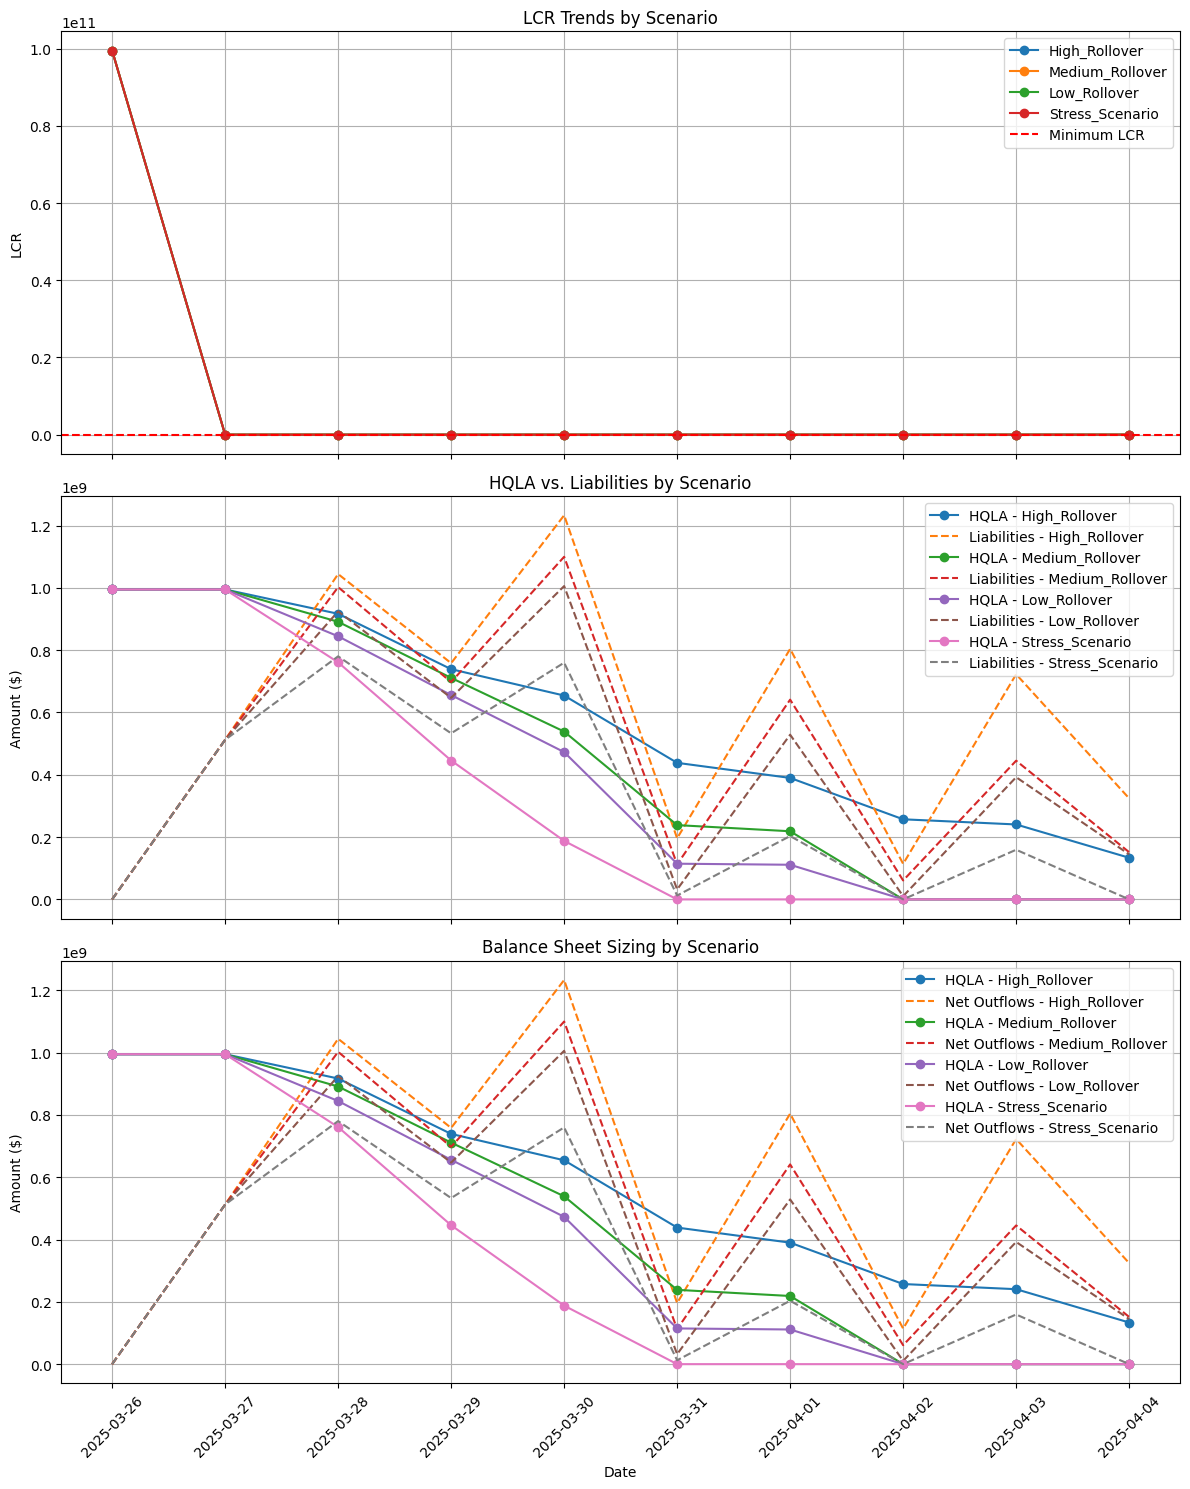

In [10]:
import matplotlib.pyplot as plt

def plot_simulation_results(results_df):
    """Plot the simulation results to visualize LCR and balance sheet metrics."""

    # Set up the plot
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15), sharex=True)

    # Plot LCR trends
    for scenario in results_df['Scenario'].unique():
        scenario_data = results_df[results_df['Scenario'] == scenario]
        axes[0].plot(scenario_data['Date'], scenario_data['LCR'], label=scenario, marker='o')

    axes[0].axhline(y=1.0, color='red', linestyle='--', label='Minimum LCR')
    axes[0].set_title('LCR Trends by Scenario')
    axes[0].set_ylabel('LCR')
    axes[0].legend()
    axes[0].grid(True)

    # Plot HQLA vs. Liabilities
    for scenario in results_df['Scenario'].unique():
        scenario_data = results_df[results_df['Scenario'] == scenario]
        axes[1].plot(scenario_data['Date'], scenario_data['HQLA'], label=f'HQLA - {scenario}', marker='o')
        axes[1].plot(scenario_data['Date'], scenario_data['Net_Cash_Outflows'], label=f'Liabilities - {scenario}', linestyle='--')

    axes[1].set_title('HQLA vs. Liabilities by Scenario')
    axes[1].set_ylabel('Amount ($)')
    axes[1].legend()
    axes[1].grid(True)

    # Plot Balance Sheet Size
    for scenario in results_df['Scenario'].unique():
        scenario_data = results_df[results_df['Scenario'] == scenario]
        axes[2].plot(scenario_data['Date'], scenario_data['HQLA'], label=f'HQLA - {scenario}', marker='o')
        axes[2].plot(scenario_data['Date'], scenario_data['Net_Cash_Outflows'], label=f'Net Outflows - {scenario}', linestyle='--')

    axes[2].set_title('Balance Sheet Sizing by Scenario')
    axes[2].set_ylabel('Amount ($)')
    axes[2].set_xlabel('Date')
    axes[2].legend()
    axes[2].grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming simulation_results is the DataFrame obtained from the simulation
plot_simulation_results(simulation_results)

Simulate multiple days balance sheet

In [11]:
def is_business_day(date):
    return bool(len(pd.bdate_range(date, date)))

def generate_multi_day_balance_sheet(num_days=10):
    """Generate balance sheet data for multiple business days"""

    # Start from current date
    current_date = datetime.now()
    all_balance_sheets = []
    days_processed = 0

    while days_processed < num_days:
        # Skip weekends
        if not is_business_day(current_date):
            current_date += timedelta(days=1)
            continue

        # Generate balance sheet for current day
        daily_balance_sheet = generate_investment_bank_balance_sheet()
        #daily_balance_sheet.columns()
        daily_balance_sheet= assign_hqla_categories(daily_balance_sheet)
        # Add date column
        #print(daily_balance_sheet.columns)
        daily_balance_sheet['report_date'] = current_date

        # Append to list
        all_balance_sheets.append(daily_balance_sheet)
        # Move to next day
        current_date += timedelta(days=1)
        days_processed += 1

    # Combine all days into one DataFrame
    combined_balance_sheet = pd.concat(all_balance_sheets, axis=0)

    return combined_balance_sheet

# Generate multi-day balance sheet
multi_day_balance_sheet = generate_multi_day_balance_sheet()

# Add analysis functions for multi-day data
def analyze_multi_day_balance_sheet(df):
    print("\nMulti-day Balance Sheet Analysis:")
    print("-" * 50)

    # Daily totals
    daily_totals = df.groupby(['report_date', 'side'])['amount'].sum().unstack()
    print("\nDaily Totals (in millions):")
    print(daily_totals / 1e6)

    # Daily asset-liability ratio
    daily_totals['Asset/Liability Ratio'] = daily_totals['Asset'] / daily_totals['Liability']
    print("\nDaily Asset/Liability Ratio:")
    print(daily_totals['Asset/Liability Ratio'])

    # Average composition by type for each day
    print("\nDaily Asset Composition:")
    daily_asset_composition = df[df['side']=='Asset'].groupby(['report_date', 'type'])['amount'].sum().unstack()
    print(daily_asset_composition / 1e6)

    print("\nDaily Liability Composition:")
    daily_liability_composition = df[df['side']=='Liability'].groupby(['report_date', 'type'])['amount'].sum().unstack()
    print(daily_liability_composition / 1e6)

# Analyze multi-day data
analyze_multi_day_balance_sheet(multi_day_balance_sheet)

# Save multi-day data to CSV
#multi_day_balance_sheet.to_csv('multi_day_balance_sheet.csv', index=False)

# Additional analysis for counterparty attributes over time
def analyze_counterparty_trends(df):
    print("\nCounterparty Trends Analysis:")
    print("-" * 50)

    # Daily average credit rating distribution
    daily_ratings = df.groupby(['report_date', 'counterparty_credit_rating']).size().unstack()
    print("\nDaily Credit Rating Distribution:")
    print(daily_ratings)

    # Daily average financial strength
    daily_strength = df.groupby('report_date')['counterparty_financial_strength'].mean()
    print("\nDaily Average Financial Strength:")
    print(daily_strength)

    # Industry concentration over time
    daily_industry = df.groupby(['report_date', 'counterparty_industry'])['amount'].sum().unstack()
    print("\nDaily Industry Concentration (in millions):")
    print(daily_industry / 1e6)

# Analyze counterparty trends
analyze_counterparty_trends(multi_day_balance_sheet)


Multi-day Balance Sheet Analysis:
--------------------------------------------------

Daily Totals (in millions):
side                              Asset    Liability
report_date                                         
2025-03-26 18:06:46.578749  6262.664954  6413.633254
2025-03-27 18:06:46.578749  6272.364752  6549.457623
2025-03-28 18:06:46.578749  6322.711803  6560.471005
2025-03-31 18:06:46.578749  6198.592304  6431.242990
2025-04-01 18:06:46.578749  6184.874033  6556.637427
2025-04-02 18:06:46.578749  6248.242262  6531.836836
2025-04-03 18:06:46.578749  6043.062270  6528.574845
2025-04-04 18:06:46.578749  6374.517003  6495.955890
2025-04-07 18:06:46.578749  6116.400062  6600.813069
2025-04-08 18:06:46.578749  6274.896452  6666.205088

Daily Asset/Liability Ratio:
report_date
2025-03-26 18:06:46.578749    0.976461
2025-03-27 18:06:46.578749    0.957692
2025-03-28 18:06:46.578749    0.963759
2025-03-31 18:06:46.578749    0.963825
2025-04-01 18:06:46.578749    0.943300
2025-04-02 1

In [12]:
# prompt: We have 10 instance of balance sheet , assign random deposit probabilities to  all liablities for first 8 days ,  be rational in assigning probabilities ,  consider counterparty attributes as well in defning probabilities , add a new colulm rollover proabalities

import pandas as pd
import numpy as np

def assign_rollover_probabilities(balance_sheet_df):
    """Assigns random deposit rollover probabilities to liabilities for the first 8 days.

    Args:
        balance_sheet_df: The DataFrame containing the balance sheet data.

    Returns:
        The DataFrame with a new 'rollover_probability' column.
    """

    balance_sheet_df['rollover_probability'] = .5  # Default to 100% probability

    for day in range(8):
        # Select liabilities for the current day
        liabilities_for_day = balance_sheet_df[
            (balance_sheet_df['side'] == 'Liability') &
            (balance_sheet_df['maturity_date'].dt.day == day + 1)
        ]

        for index, liability in liabilities_for_day.iterrows():
            # Consider counterparty attributes to adjust probability
            counterparty_credit_rating = liability['counterparty_credit_rating']
            counterparty_financial_strength = liability['counterparty_financial_strength']

            base_probability = 0.5  # Start with a base probability

            # Adjust probability based on credit rating (example)
            if counterparty_credit_rating in ['AAA', 'AA+']:
                base_probability += 0.15
            elif counterparty_credit_rating in ['BBB', 'BBB-']:
                base_probability -= 0.15
            elif counterparty_credit_rating in ['B', 'C']:
                base_probability -= 0.10

            # Adjust probability based on financial strength (example)
            if counterparty_financial_strength > 0.85:
                base_probability += 0.05
            elif counterparty_financial_strength < 0.7:
                base_probability -= 0.05

            # Ensure the probability remains within bounds
            rollover_probability = max(0.5, min(1.0, base_probability + np.random.uniform(-0.05, 0.05)))
            balance_sheet_df.loc[index, 'rollover_probability'] = rollover_probability

    return balance_sheet_df


# Example Usage:
# Assuming you have a 'balance_sheet' DataFrame, you would use it as follows:
# balance_sheet_with_probabilities = assign_rollover_probabilities(balance_sheet)
multi_day_balance_sheet= assign_rollover_probabilities(multi_day_balance_sheet)

In [13]:
multi_day_balance_sheet['rollover_probability'].describe()

,rollover_probability
count,10250.000000
mean,0.526275
std,0.053733
min,0.500000
25%,0.500000
50%,0.500000
75%,0.525301
max,0.746360


In [14]:
multi_day_balance_sheet.columns

Index(['transaction_id', 'type', 'amount', 'start_date', 'maturity_date',
       'interest_rate', 'remaining_maturity_days',
       'counterparty_credit_rating', 'counterparty_industry',
       'counterparty_relationship_years', 'counterparty_default_history',
       'counterparty_financial_strength', 'side', 'hqla_category', 'haircut',
       'report_date', 'rollover_probability'],
      dtype='object')

Train data shape: (9225, 17)
Predict data shape: (1025, 17)

Model Insights:
--------------------------------------------------

Top 10 Most Important Features:
                            feature  importance
0                      type_encoded    0.210719
2                             tenor    0.085693
3                     interest_rate    0.070277
13         credit_tenor_interaction    0.069871
9   counterparty_financial_strength    0.068235
11                 days_since_start    0.066402
14      amount_strength_interaction    0.066359
7   counterparty_relationship_years    0.065166
10                     side_encoded    0.064058
8      counterparty_default_history    0.062536

Prediction Summary Statistics:
count    1025.000000
mean        0.526818
std         0.020741
min         0.489088
25%         0.506892
50%         0.529553
75%         0.541430
max         0.612227
Name: predicted_rollover_probability, dtype: float64

Prediction Analysis by Category:
------------------------

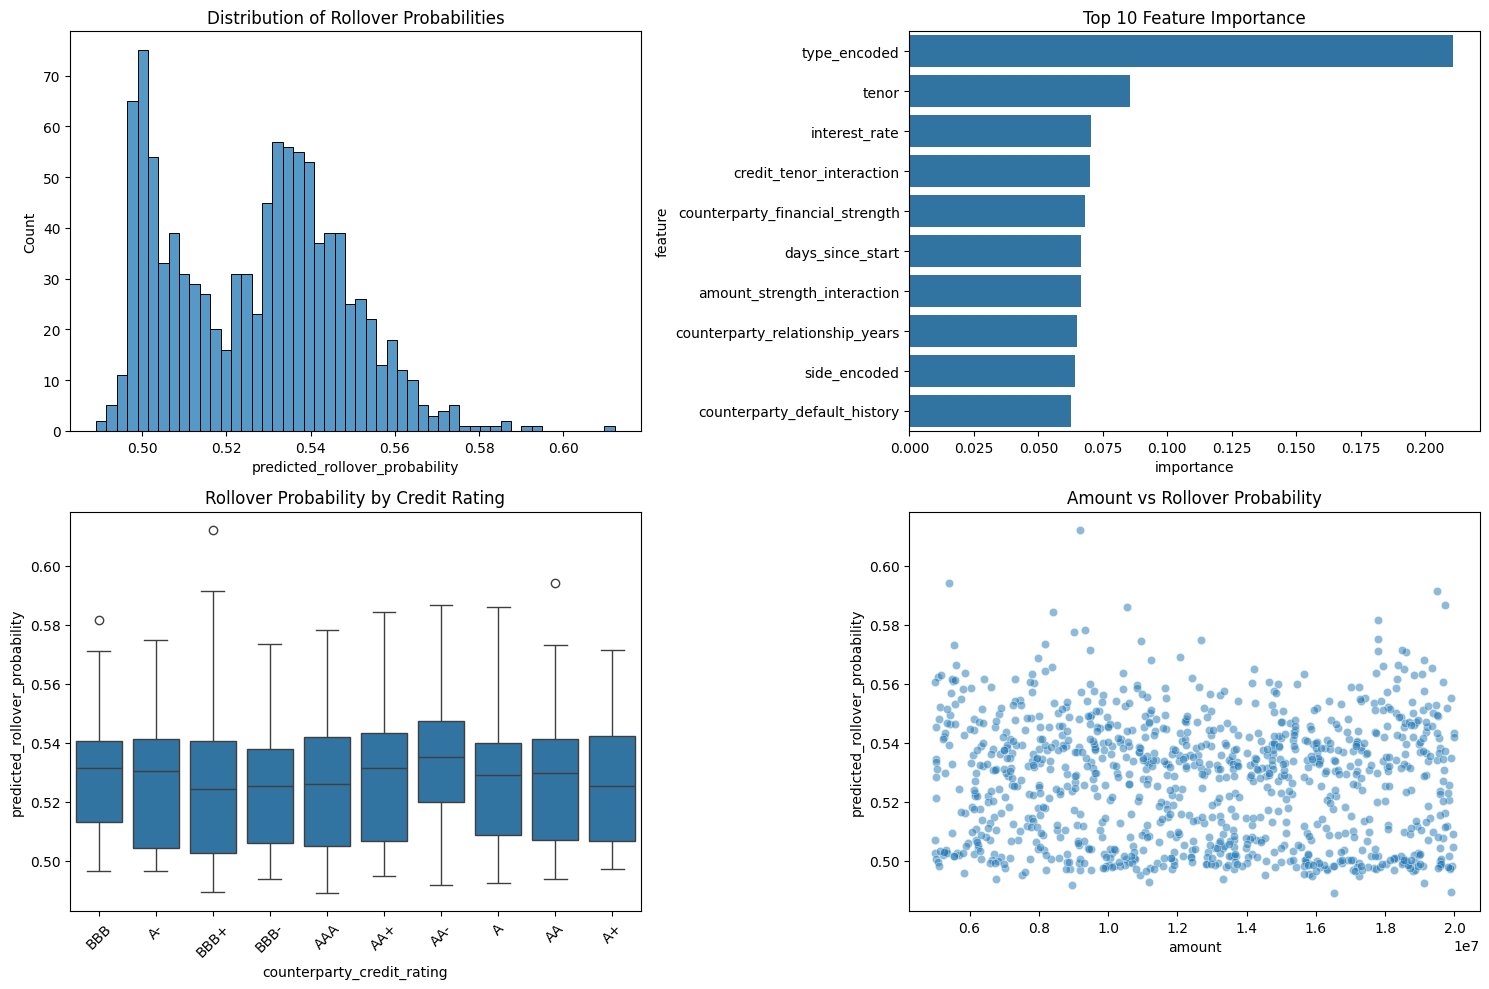

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns


import pandas as pd

report_dates = multi_day_balance_sheet['report_date'].unique()

train_data = []
predict_data = []

for i, report_date in enumerate(report_dates):
  if i < len(report_dates) - 1:
    train_data.append(
        multi_day_balance_sheet[multi_day_balance_sheet['report_date'] == report_date]
    )
  else:
    predict_data.append(
        multi_day_balance_sheet[multi_day_balance_sheet['report_date'] == report_date]
    )

train_df = pd.concat(train_data)
predict_df = pd.concat(predict_data)

print("Train data shape:", train_df.shape)
print("Predict data shape:", predict_df.shape)


def predict_rollover_probabilities(train_df, predict_df):
    """
    Train model on train_df and make predictions on predict_df
    """
    # Prepare features for training data
    def prepare_features(df):
        """Prepare features for machine learning"""

        # Create copy of dataframe
        df_ml = df.copy()

        # Convert dates to datetime if they aren't already
        date_columns = ['start_date', 'maturity_date', 'report_date']
        for col in date_columns:
            df_ml[col] = pd.to_datetime(df_ml[col])

        # Feature Engineering
        # 1. Time-based features
        df_ml['tenor'] = (df_ml['maturity_date'] - df_ml['start_date']).dt.days
        df_ml['days_since_start'] = (df_ml['report_date'] - df_ml['start_date']).dt.days
        df_ml['remaining_tenor_pct'] = df_ml['remaining_maturity_days'] / df_ml['tenor']

        # 2. Amount-based features
        df_ml['log_amount'] = np.log1p(df_ml['amount'])

        # 3. Categorical encoding
        le = LabelEncoder()
        df_ml['type_encoded'] = le.fit_transform(df_ml['type'])
        df_ml['side_encoded'] = le.fit_transform(df_ml['side'])
        df_ml['credit_rating_encoded'] = le.fit_transform(df_ml['counterparty_credit_rating'])
        df_ml['industry_encoded'] = le.fit_transform(df_ml['counterparty_industry'])

        # 4. Create interaction features
        df_ml['credit_tenor_interaction'] = df_ml['credit_rating_encoded'] * df_ml['tenor']
        df_ml['amount_strength_interaction'] = df_ml['log_amount'] * df_ml['counterparty_financial_strength']

        # Select features for modeling
        features = [
            'type_encoded', 'log_amount', 'tenor', 'interest_rate',
            'remaining_maturity_days', 'credit_rating_encoded', 'industry_encoded',
            'counterparty_relationship_years', 'counterparty_default_history',
            'counterparty_financial_strength', 'side_encoded', 'days_since_start',
            'remaining_tenor_pct', 'credit_tenor_interaction', 'amount_strength_interaction'
        ]

        return df_ml, features

    # Prepare training data
    train_df_prepared, features = prepare_features(train_df)
    X_train = train_df_prepared[features]
    y_train = train_df_prepared['rollover_probability']

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    # Train model (using XGBoost as it usually performs well)
    model = XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=6,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)

    # Prepare prediction data
    predict_df_prepared, _ = prepare_features(predict_df)
    X_predict = predict_df_prepared[features]
    X_predict_scaled = scaler.transform(X_predict)

    # Make predictions
    predictions = model.predict(X_predict_scaled)

    # Add predictions to predict_df
    predict_df['predicted_rollover_probability'] = predictions

    # Add feature importance analysis
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Print model insights
    print("\nModel Insights:")
    print("-" * 50)
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))

    print("\nPrediction Summary Statistics:")
    print(predict_df['predicted_rollover_probability'].describe())

    # Analyze predictions
    def analyze_predictions(df):
        print("\nPrediction Analysis by Category:")
        print("-" * 50)

        # Analysis by type
        print("\nAverage Rollover Probability by Type:")
        print(df.groupby('type')['predicted_rollover_probability'].mean().sort_values(ascending=False))

        # Analysis by credit rating
        print("\nAverage Rollover Probability by Credit Rating:")
        print(df.groupby('counterparty_credit_rating')['predicted_rollover_probability'].mean().sort_values(ascending=False))

        # Analysis by industry
        print("\nAverage Rollover Probability by Industry:")
        print(df.groupby('counterparty_industry')['predicted_rollover_probability'].mean().sort_values(ascending=False))

        # Create risk categories
        df['rollover_risk_category'] = pd.qcut(df['predicted_rollover_probability'],
                                             q=5,
                                             labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

        print("\nDistribution of Rollover Risk Categories:")
        print(df['rollover_risk_category'].value_counts())

    # Analyze specific segments
    def analyze_specific_segments(df):
        print("\nDetailed Segment Analysis:")
        print("-" * 50)

        # High-value transactions
        high_value_threshold = df['amount'].quantile(0.9)
        high_value_predictions = df[df['amount'] > high_value_threshold]['predicted_rollover_probability']
        print(f"\nHigh-Value Transactions (top 10%):")
        print(f"Average Rollover Probability: {high_value_predictions.mean():.3f}")

        # Short-term vs Long-term
        short_term = df[df['remaining_maturity_days'] <= 90]['predicted_rollover_probability']
        long_term = df[df['remaining_maturity_days'] > 90]['predicted_rollover_probability']
        print("\nShort-term vs Long-term Comparison:")
        print(f"Short-term (<= 90 days) Average: {short_term.mean():.3f}")
        print(f"Long-term (> 90 days) Average: {long_term.mean():.3f}")

        # Top counterparties
        print("\nTop 5 Counterparties by Average Rollover Probability:")
        top_counterparties = df.groupby('counterparty_credit_rating')['predicted_rollover_probability'].agg(
            ['mean', 'count']).sort_values('mean', ascending=False).head()
        print(top_counterparties)

    # Visualize predictions
    def visualize_predictions(df, feature_importance):
        plt.figure(figsize=(15, 10))

        # Distribution of predictions
        plt.subplot(2, 2, 1)
        sns.histplot(df['predicted_rollover_probability'], bins=50)
        plt.title('Distribution of Rollover Probabilities')

        # Top features importance
        plt.subplot(2, 2, 2)
        sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
        plt.title('Top 10 Feature Importance')

        # Rollover probability by credit rating
        plt.subplot(2, 2, 3)
        sns.boxplot(x='counterparty_credit_rating', y='predicted_rollover_probability', data=df)
        plt.xticks(rotation=45)
        plt.title('Rollover Probability by Credit Rating')

        # Scatter plot of amount vs rollover probability
        plt.subplot(2, 2, 4)
        sns.scatterplot(x='amount', y='predicted_rollover_probability', data=df, alpha=0.5)
        plt.title('Amount vs Rollover Probability')

        plt.tight_layout()
        plt.show()

    # Run analyses
    analyze_predictions(predict_df)
    analyze_specific_segments(predict_df)
    visualize_predictions(predict_df, feature_importance)

    # Save predictions to CSV
    predict_df.to_csv('predictions_with_rollover_probabilities.csv', index=False)

    return predict_df, feature_importance, model

# Example usage (uncomment and run after loading your data):
predicted_df, feature_importance, trained_model = predict_rollover_probabilities(train_df, predict_df)

# To get predictions for specific segments:
high_risk = predicted_df[predicted_df['predicted_rollover_probability'] > 0.8]
specific_segment = predicted_df[(predicted_df['type'] == 'specific_type') & (predicted_df['counterparty_credit_rating'] == 'specific_rating') ]

In [17]:
predict_df['predicted_rollover_probability'].describe()

,predicted_rollover_probability
count,1025.000000
mean,0.526818
std,0.020741
min,0.489088
25%,0.506892
50%,0.529553
75%,0.541430
max,0.612227


In [18]:
predict_df['rollover_probability']

,rollover_probability
0,0.500000
1,0.500000
2,0.500000
3,0.500000
4,0.504655
...,...
520,0.500000
521,0.514567
522,0.500000
523,0.500000


Predicted_Scenario
0.49730637669563293
rollover_prob
0.4971095025539398
rollover_prob
0.5071185231208801
0.5003431439399719
0.5011113286018372
0.4986039400100708
rollover_prob
0.5038976669311523
0.49845290184020996
rollover_prob
0.49920544028282166
rollover_prob
0.49824315309524536
rollover_prob
0.4973675310611725
rollover_prob
0.5013230443000793
0.49820271134376526
rollover_prob
0.4982566237449646
rollover_prob
0.5006663799285889
0.5183852314949036
0.5004786252975464
0.4969537854194641
rollover_prob
0.5009732246398926
0.49964484572410583
rollover_prob
0.49953514337539673
rollover_prob
0.5085764527320862
0.5014405846595764
0.49884217977523804
rollover_prob
0.501362144947052
0.49919232726097107
rollover_prob
0.4980458617210388
rollover_prob
0.5081164836883545
0.49794965982437134
rollover_prob
0.4928140938282013
rollover_prob
0.4986932873725891
rollover_prob
0.49827656149864197
rollover_prob
0.49930641055107117
rollover_prob
0.5001952648162842
0.5143707394599915
0.5060479044914246
0.5002

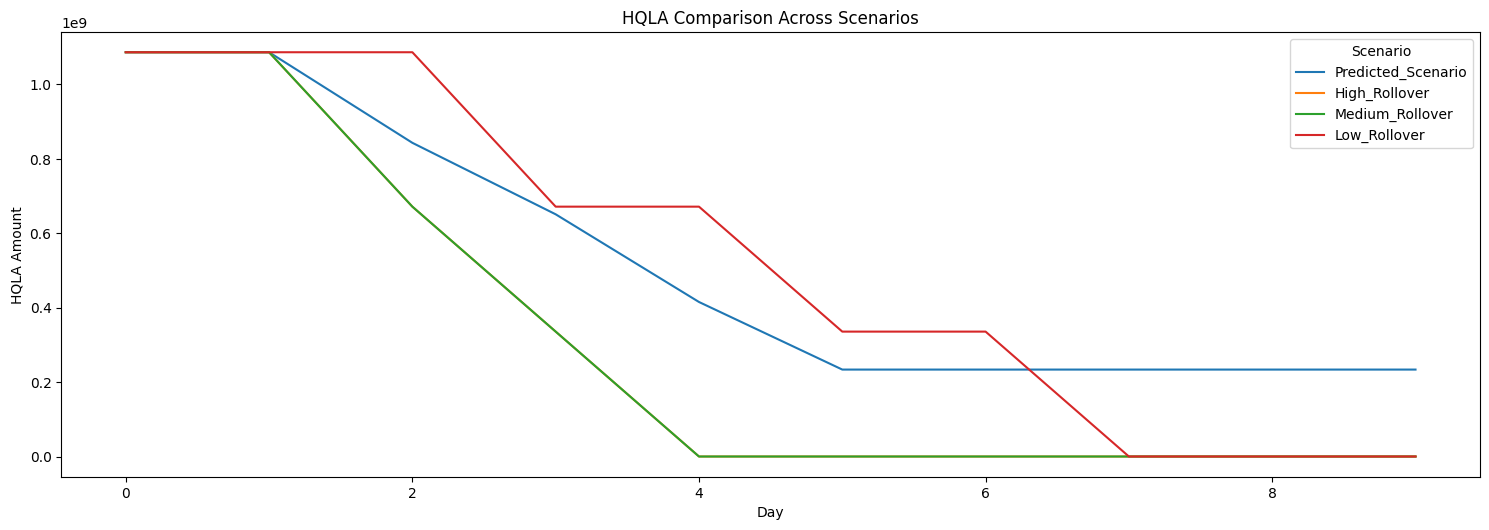


Scenario Summary Statistics:
--------------------------------------------------
                            HQLA                                       LCR  \
                            mean           min           max          mean   
Scenario                                                                     
High_Rollover       3.179330e+08  0.000000e+00  1.086217e+09  1.086217e+10   
Low_Rollover        5.272444e+08  0.000000e+00  1.086217e+09  1.086217e+10   
Medium_Rollover     3.179330e+08  0.000000e+00  1.086217e+09  1.086217e+10   
Predicted_Scenario  5.249129e+08  2.335884e+08  1.086217e+09  1.086217e+10   

                                       
                    min           max  
Scenario                               
High_Rollover       0.0  1.086217e+11  
Low_Rollover        0.0  1.086217e+11  
Medium_Rollover     0.0  1.086217e+11  
Predicted_Scenario  0.3  1.086217e+11  


In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")


def simulate_balance_sheet_with_lcr(balance_sheet_df, simulation_days=10):
    scenarios = {
        'Predicted_Scenario': {
            'use_predicted': True,
            'threshold': 0.5
        },
        'High_Rollover': {
            'threshold': 0.75
        },
        'Medium_Rollover': {
            'threshold': 0.60
        },
        'Low_Rollover': {
            'threshold': 0.45
        }
    }

    all_results = []

    for scenario_name, params in scenarios.items():
        current_bs = balance_sheet_df.copy()
        current_date = datetime.now()
        print(scenario_name)

        for day in range(simulation_days):
            simulation_date = current_date + timedelta(days=day)

            maturing_liabilities = current_bs[
                (current_bs['side'] == 'Liability') &
                (current_bs['maturity_date'].dt.date == simulation_date.date())
            ]

            maturing_assets = current_bs[
                (current_bs['side'] == 'Asset') &
                (current_bs['maturity_date'].dt.date == simulation_date.date())
            ]

            lcr_metrics = calculate_lcr_metrics(
                current_bs, maturing_liabilities, maturing_assets
            )

            all_results.append({
                'Date': simulation_date.strftime('%Y-%m-%d'),
                'Scenario': scenario_name,
                'HQLA': lcr_metrics['hqla'],
                'Net_Cash_Outflows': lcr_metrics['net_outflows'],
                'LCR': lcr_metrics['lcr'],
                'Day': day
            })

            for _, liability in maturing_liabilities.iterrows():
                if scenario_name == 'Predicted_Scenario':

                    rollover_prob = liability['predicted_rollover_probability']

                else:
                    # Compare predicted probability with scenario threshold
                    rollover_prob = 1 if liability['predicted_rollover_probability'] >= params['threshold'] else 0
                if rollover_prob < params.get('threshold', 0.5):  # Non-rollover case
                    # Handle non-rollover case


                    hqla_assets = current_bs[(current_bs['side'] == 'Asset') &
                                          (current_bs['hqla_category'] != 'Non-HQLA')]
                    if not hqla_assets.empty:
                        hqla_assets.sort_values(by='amount', ascending=False, inplace=True)
                        for _, asset in hqla_assets.iterrows():
                            if liability['amount'] > 0:
                                sell_amount = min(asset['amount'], liability['amount'])
                                liability['amount'] -= sell_amount
                                current_bs.loc[current_bs['transaction_id'] == asset['transaction_id'], 'amount'] -= sell_amount
                                if current_bs.loc[current_bs['transaction_id'] == asset['transaction_id'], 'amount'].sum() <= 0:
                                    current_bs = current_bs[current_bs['transaction_id'] != asset['transaction_id']]
                else:  # Rollover case
                    maturity_days = (liability['maturity_date'] - liability['start_date']).days
                    new_maturity_date = liability['maturity_date'] + timedelta(days=maturity_days)
                    new_liability = pd.DataFrame([{
                        'transaction_id': liability['transaction_id'],
                        'side': 'Liability',
                        'amount': liability['amount'],
                        'start_date': liability['maturity_date'],
                        'maturity_date': new_maturity_date
                    }])
                    current_bs = pd.concat([current_bs, new_liability], ignore_index=True)

    return pd.DataFrame(all_results)

def plot_scenario_comparison(simulation_results):
    """Create comparative plots for all scenarios"""
    plt.figure(figsize=(15, 10))

    # Plot 1: HQLA Comparison
    plt.subplot(2, 1, 1)
    sns.lineplot(data=simulation_results, x='Day', y='HQLA', hue='Scenario')
    plt.title('HQLA Comparison Across Scenarios')
    plt.ylabel('HQLA Amount')



    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("\nScenario Summary Statistics:")
    print("-" * 50)
    summary = simulation_results.groupby('Scenario').agg({
        'HQLA': ['mean', 'min', 'max'],
        'LCR': ['mean', 'min', 'max']
    }).round(2)
    print(summary)

# Run simulation with both standard scenarios and predicted probabilities
simulation_results = simulate_balance_sheet_with_lcr(predict_df)

# Create comparative plots
plot_scenario_comparison(simulation_results)

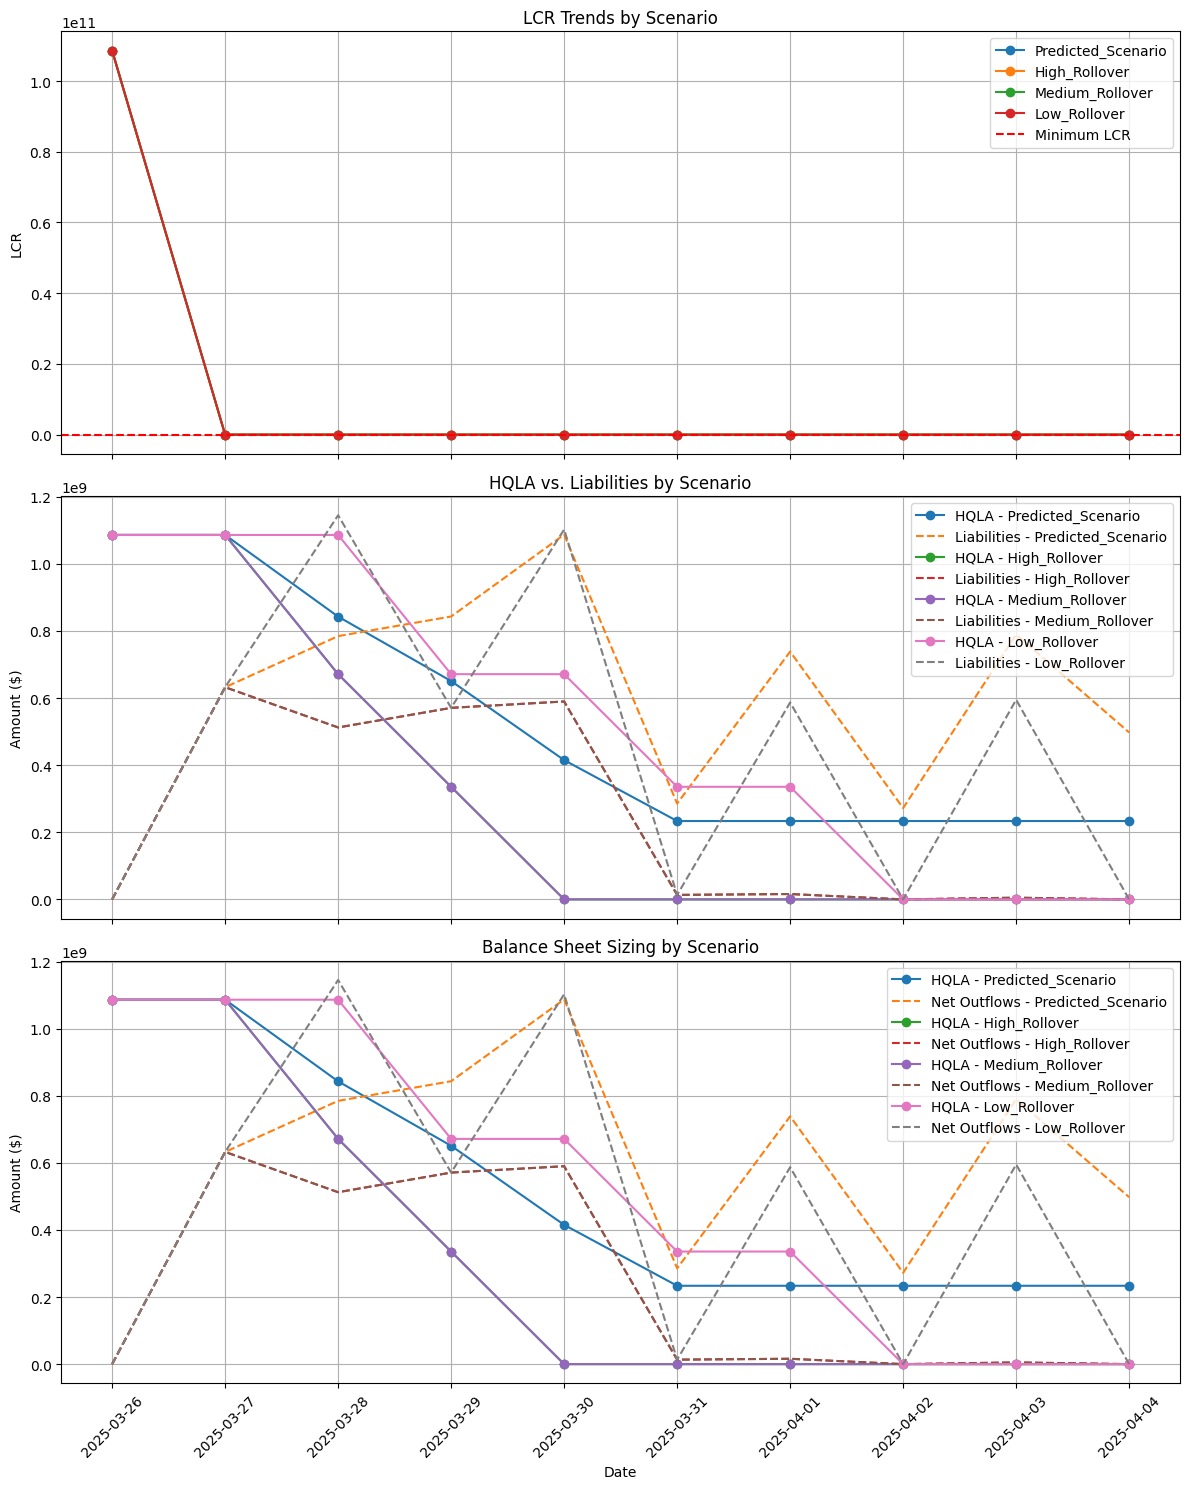

In [21]:
import matplotlib.pyplot as plt

def plot_simulation_results(results_df):
    """Plot the simulation results to visualize LCR and balance sheet metrics."""

    # Set up the plot
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15), sharex=True)

    # Plot LCR trends
    for scenario in results_df['Scenario'].unique():
        scenario_data = results_df[results_df['Scenario'] == scenario]
        axes[0].plot(scenario_data['Date'], scenario_data['LCR'], label=scenario, marker='o')

    axes[0].axhline(y=1.0, color='red', linestyle='--', label='Minimum LCR')
    axes[0].set_title('LCR Trends by Scenario')
    axes[0].set_ylabel('LCR')
    axes[0].legend()
    axes[0].grid(True)

    # Plot HQLA vs. Liabilities
    for scenario in results_df['Scenario'].unique():
        scenario_data = results_df[results_df['Scenario'] == scenario]
        axes[1].plot(scenario_data['Date'], scenario_data['HQLA'], label=f'HQLA - {scenario}', marker='o')
        axes[1].plot(scenario_data['Date'], scenario_data['Net_Cash_Outflows'], label=f'Liabilities - {scenario}', linestyle='--')

    axes[1].set_title('HQLA vs. Liabilities by Scenario')
    axes[1].set_ylabel('Amount ($)')
    axes[1].legend()
    axes[1].grid(True)

    # Plot Balance Sheet Size
    for scenario in results_df['Scenario'].unique():
        scenario_data = results_df[results_df['Scenario'] == scenario]
        axes[2].plot(scenario_data['Date'], scenario_data['HQLA'], label=f'HQLA - {scenario}', marker='o')
        axes[2].plot(scenario_data['Date'], scenario_data['Net_Cash_Outflows'], label=f'Net Outflows - {scenario}', linestyle='--')

    axes[2].set_title('Balance Sheet Sizing by Scenario')
    axes[2].set_ylabel('Amount ($)')
    axes[2].set_xlabel('Date')
    axes[2].legend()
    axes[2].grid(True)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming simulation_results is the DataFrame obtained from the simulation
plot_simulation_results(simulation_results)